<a href="https://colab.research.google.com/github/astrekhin/python_financial_markets/blob/main/ipynb/python_and_statistics_for_finanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python and Statistics for Financial Analysis**

[Source](https://www.coursera.org/learn/python-statistics-financial-analysis/)

Essencial Package:
- [Pandas](https://pandas.pydata.org/about.html)
- [NumPy](http://www.numpy.org/)
- [Matplotlib](https://matplotlib.org/)
- [Statsmodels](https://www.statsmodels.org/stable/index.html)

## Содержание

- [Visualizing and Munging Stock Data](#scrollTo=zskSSTJsuNOY&line=1&uniqifier=1)
- [Random variables and distribution](#scrollTo=0Wm7I9PGwkWZ&line=1&uniqifier=1)
- [Sampling and Inference](#scrollTo=MErlI2yww0XH&line=1&uniqifier=1)
- [Linear Regression Models for Financial Analysis](#scrollTo=0rFE5X3fw3-3&line=1&uniqifier=1)

## **Visualizing and Munging Stock Data**

### 1. Importing Data

In [ ]:
# Import the packages "Pandas" and "MatPlotLib"
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Import Facebook's stock data from Google Drive
url_fb = 'https://drive.google.com/file/d/1VaXAnuxVBBN604Kk50MOijHiIpMdfD3a/view?usp=sharing'
url_fb='https://drive.google.com/uc?id=' + url_fb.split('/')[-2]
fb = pd.read_csv(url_fb, index_col=0)

In [ ]:
# Import Nicrosoft's stock data from Google Drive
url_ms = 'https://drive.google.com/file/d/1oIC2mqn1crbMnD6Rrp6oXG1na3AZuqk2/view?usp=sharing'
url_ms ='https://drive.google.com/uc?id=' + url_ms.split('/')[-2]
ms = pd.read_csv(url_ms, index_col=0)

You need to tell which column of the csv file you want to set as index, for example, the first column with "index_col=0" . Otherwise, it will use 0,1,2,3..as index by default.

### 2. Exploring Data

#### Show the size of a DataFrame using "Shape"

In [ ]:
# Print the shape of Facebook
print(fb.shape)

(780, 6)


In [ ]:
# Print the shape of Miscosoft
print(ms.shape)

(780, 6)


#### Show summary statistics of a DataFrame

In [ ]:
# Print summary statistics of a DataFrame
print(fb.describe)

In [ ]:
# Print summary statistics of Microsoft
print(ms.describe)

#### Locate a particular row of data using "Selection by label"

In [ ]:
# Select all the price information of Facebook in 2016
fb_2015 = fb.loc['2015-01-01':'2015-12-31']

In [ ]:
# Print the price of Facebook on '2015-03-16'
fb_2015.loc['2015-03-16']

Open         2.288000e+01
High         2.311000e+01
Low          2.273000e+01
Close        2.297000e+01
Adj Close    2.237908e+01
Volume       5.923900e+06
Name: 2015-03-16, dtype: float64

In [ ]:
# Select all the price information of Microsoft in 2016
ms_2015 = ms.loc['2015-01-01':'2015-12-31']

In [ ]:
# Print the price of Microsoft on '2016-03-16'
print(ms.loc['2016-03-16'])

Open         5.345000e+01
High         5.460000e+01
Low          5.340000e+01
Close        5.435000e+01
Adj Close    5.187095e+01
Volume       3.169170e+07
Name: 2016-03-16, dtype: float64


#### Locate a particular row of data using "Selection by position"

In [ ]:
# Print the opening price of the first row
fb.iloc[0, 0]

20.4

In [ ]:
# Print the opening price of the last row
ms.iloc[-1, 0]

90.559998

#### Plot the stock data using plot() method

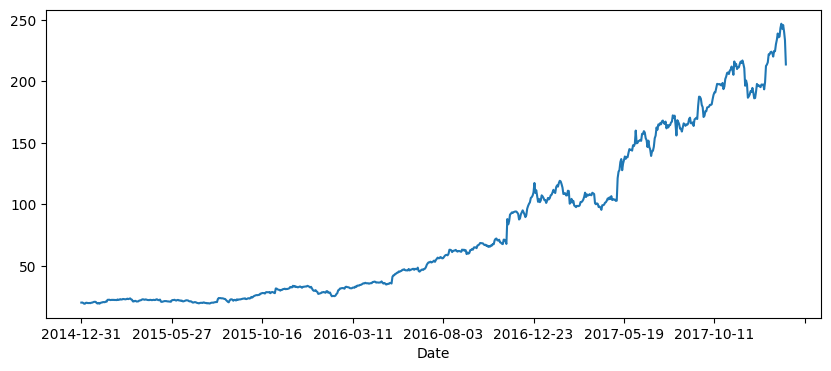

In [ ]:
# Plot only the Close price of 2016 of Microsoft
plt.figure(figsize=(10, 4))
fb['Close'].plot()
plt.show()

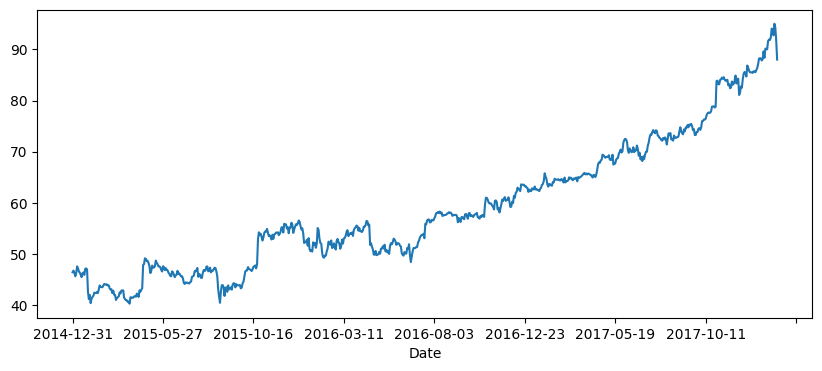

In [ ]:
# Plot only the Close price of 2016 of Microsoft
plt.figure(figsize=(10, 4))
ms['Close'].plot()
plt.show()

### 3. Analyzing Data

In [ ]:
# Select a single column from a DataFrame
fb['Close']

In [ ]:
# Select multiple columns from a DataFrame
fb[['Open', 'Close']]

#### Create a new column in the DataFrame (1) - Price Difference

"Price Difference" is calcuated as "Close price of tomorrow" - "Close price of today"

In [ ]:
# Create a new column PriceDiff in the DataFrame fb
fb['PriceDiff'] = fb['Close'].shift(-1) - fb['Close']

In [ ]:
# Create a new column PriceDiff in the DataFrame ms
ms['PriceDiff'] = ms['Close'].shift(-1) - ms['Close']

In [ ]:
# Display the price difference of Microsoft on 2015-01-05
print(ms['PriceDiff'].loc['2015-01-05'])

-0.6799999999999997


#### Create a new column in the DataFrame (2) - Daily Return

"Daily Return" is calcuated as "Price Difference"/"Close price of today" or
"Close price of tomorrow"/"Close price of today" - 1

In [ ]:
# Create a new column Return in the DataFrame fb
fb['Return'] = fb['PriceDiff']/fb['Close']

In [ ]:
# Create a new column Return in the DataFrame ms
ms['Return'] = ms['PriceDiff']/ms['Close']

In [ ]:
# Display the return on 2015-01-05
print(ms['Return'].loc['2015-01-05'])

-0.014677314281143345


#### Create a new column in the DataFrame using List Comprehension - Direction

In [ ]:
# Create a new column Direction
# The List Comprehension means : if the price difference is larger than 0, denote as 1, otherwise, denote as 0,
# for every record in the DataFrame - fb
# ei - Element Index

fb['Direction'] = [1 if fb['PriceDiff'].loc[ei] > 0 else 0 for ei in fb.index]
ms['Direction'] = [1 if ms.loc[ei, 'PriceDiff'] > 0 else -1 for ei in ms.index]

In [ ]:
# Show the price difference on 2015-01-05
print('Price difference on {} is {}. direction is {}'.format('2015-01-05', ms['PriceDiff'].loc['2015-01-05'], ms['Direction'].loc['2015-01-05']))
print(f"Price difference on 2015-01-05 is {ms['PriceDiff'].loc['2015-01-05']}. direction is {ms['Direction'].loc['2015-01-05']}")

Price difference on 2015-01-05 is -0.6799999999999997. direction is -1
Price difference on 2015-01-05 is -0.6799999999999997. direction is -1


#### Create a new column in the DataFrame using Rolling Window calculation (.rolling()) - Moving average

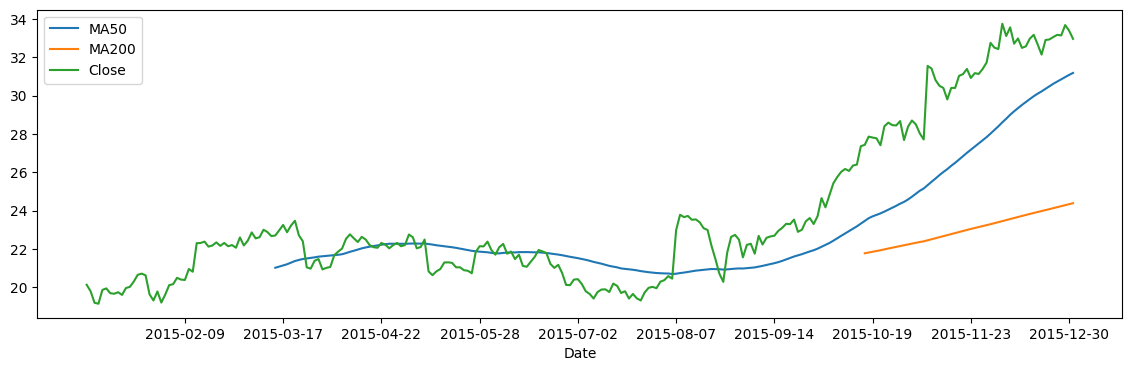

In [ ]:
fb['ma50'] = fb['Close'].rolling(50).mean()
fb['ma200'] = fb['Close'].rolling(200).mean()

# Plot the moving average
plt.figure(figsize=(14, 4))
fb['ma50'].loc['2015-01-01':'2015-12-31'].plot(label='MA50')
fb['ma200'].loc['2015-01-01':'2015-12-31'].plot(label='MA200')
fb['Close'].loc['2015-01-01':'2015-12-31'].plot(label='Close')
plt.legend()
plt.show()

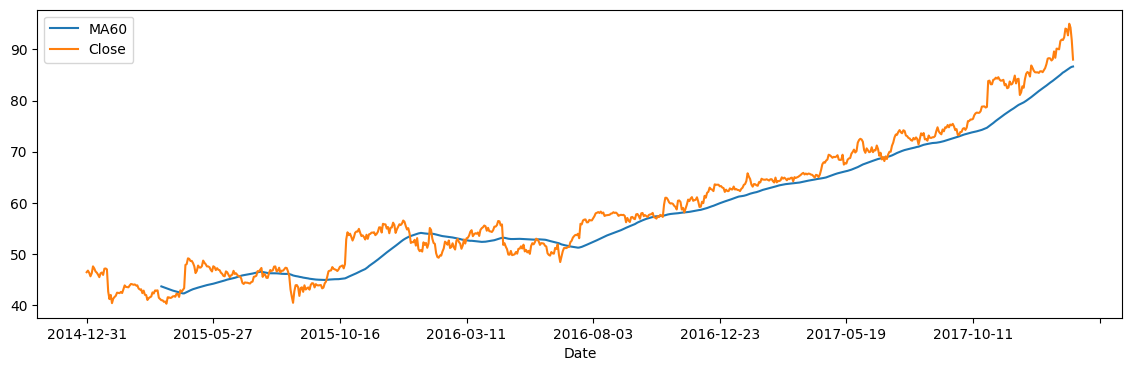

In [ ]:
ms['ma60'] = ms['Close'].rolling(60).mean()

# Plot the moving average
plt.figure(figsize=(14, 4))
ms['ma60'].plot(label='MA60')
ms['Close'].plot(label='Close')
plt.legend()
plt.show()

### 4. Build a simple trading strategy

#### 1. Munging the stock data and add two columns - MA10 and MA50

In [ ]:
# Import FB's stock data, add two columns - MA10 and MA50
# Remove any "NaN (Not a Number)" data
fb = pd.read_csv(url_fb, index_col=0)
fb['MA10'] = fb['Close'].rolling(10).mean()
fb['MA50'] = fb['Close'].rolling(50).mean()
fb = fb.dropna()
fb.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
Date,,,,,,,,
2015-03-13,22.559999,22.760000,22.250000,22.700001,22.116024,8982200,22.648,21.0174
2015-03-16,22.879999,23.110001,22.730000,22.969999,22.379078,5923900,22.685,21.0758
2015-03-17,22.920000,23.260000,22.760000,23.250000,22.651876,7497500,22.792,21.1382
2015-03-18,23.250000,23.370001,22.660000,22.870001,22.281652,10337600,22.836,21.1998
2015-03-19,22.950001,23.299999,22.780001,23.219999,22.622650,7768900,22.872,21.2804


#### 2. Add "Shares" column to make decisions base on the strategy

In [ ]:
# Add a new column "Shares", if MA10>MA50, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)
fb['Shares'] = [1 if fb.loc[ei, 'MA10'] > fb.loc[ei, 'MA50'] else 0 for ei in fb.index]

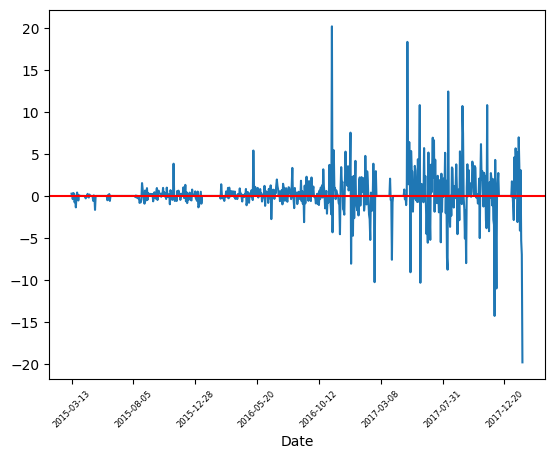

In [ ]:
# Add a new column "Profit" using List Comprehension, for any rows in fb, if Shares=1, the profit is calculated as the close price of
# tomorrow - the close price of today. Otherwise the profit is 0.
# Plot a graph to show the Profit/Loss
fb['Close1'] = fb['Close'].shift(-1)
fb['Profit'] = [fb.loc[ei, 'Close1'] - fb.loc[ei, 'Close'] if fb.loc[ei, 'Shares']==1 else 0 for ei in fb.index]
fb['Profit'].plot();
plt.xticks(rotation = 45, fontsize = 6)
plt.axhline(y=0, color='red')

#### 3. Use .cumsum() to display our model's performance if we follow the strategy

In [ ]:
# Use .cumsum() to calculate the accumulated wealth over the period
fb['wealth'] = fb['Profit'].cumsum()
fb.tail()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit,wealth
Date,,,,,,,,,,,,
2018-01-30,241.110001,246.419998,238.410004,242.720001,242.720001,14270800,235.692003,210.030001,1,245.800003,3.080002,177.820011
2018-01-31,245.770004,249.270004,244.449997,245.800003,245.800003,11964400,237.800003,210.713801,1,240.500000,-5.300003,172.520008
2018-02-01,238.520004,246.899994,238.059998,240.500000,240.500000,12980600,239.406003,211.296601,1,233.520004,-6.979996,165.540012
2018-02-02,237.000000,237.970001,231.169998,233.520004,233.520004,17961600,239.747003,211.685401,1,213.699997,-19.820007,145.720005
2018-02-05,227.000000,233.229996,205.000000,213.699997,213.699997,28869000,237.748003,211.638401,1,NaN,NaN,NaN


Text(0.5, 1.0, 'Total money you win is 145.72000500000001')

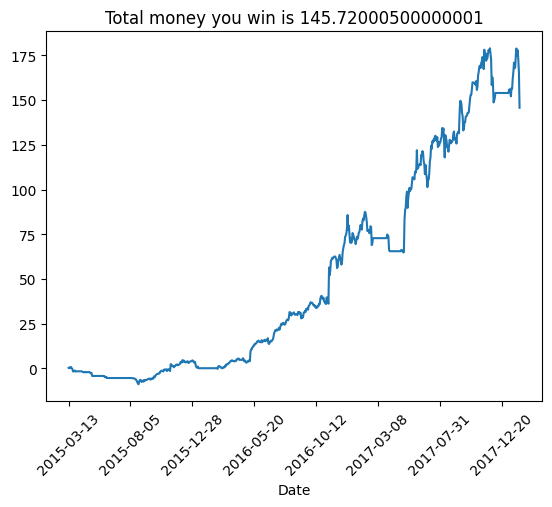

In [ ]:
# Plot the wealth to show the growth of profit over the period
fb['wealth'].plot()
plt.xticks(rotation = 45)
plt.title('Total money you win is {}'.format(fb.loc[fb.index[-2], 'wealth']))

In [ ]:
fb.loc['2015-01-01':'2016-12-31', 'Close']

Date
2015-03-13     22.700001
2015-03-16     22.969999
2015-03-17     23.250000
2015-03-18     22.870001
2015-03-19     23.219999
                 ...    
2016-12-23    109.779999
2016-12-27    117.320000
2016-12-28    109.250000
2016-12-29    111.430000
2016-12-30    106.739998
Name: Close, Length: 456, dtype: float64

## **Random variables and distribution**

## **Sampling and Inference**

## **Linear Regression Models for Financial Analysis**